In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/flood.csv')

In [3]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [4]:
print(df.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [5]:
df.dropna()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


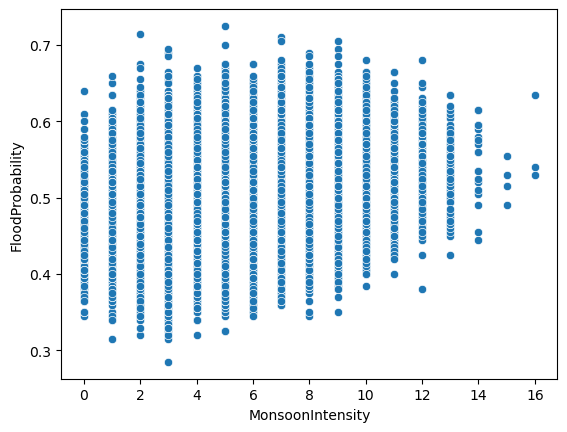

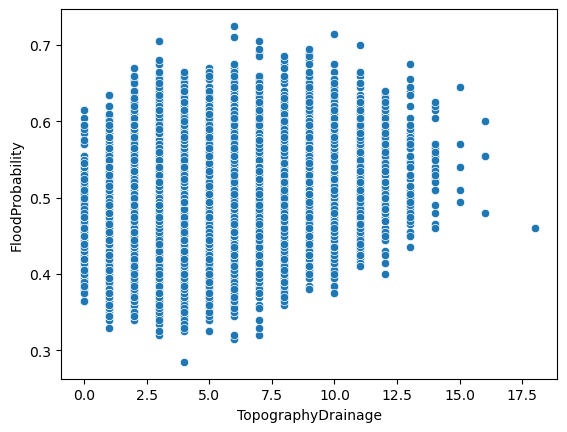

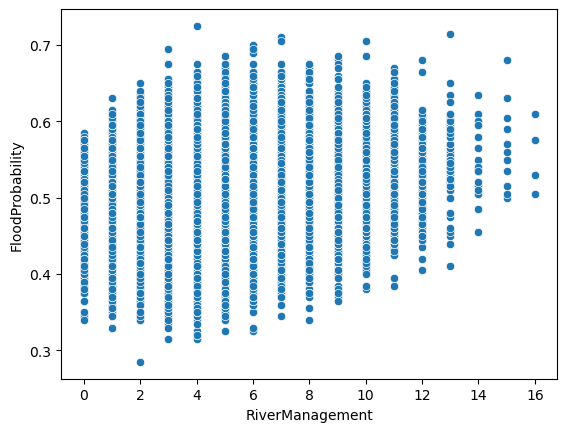

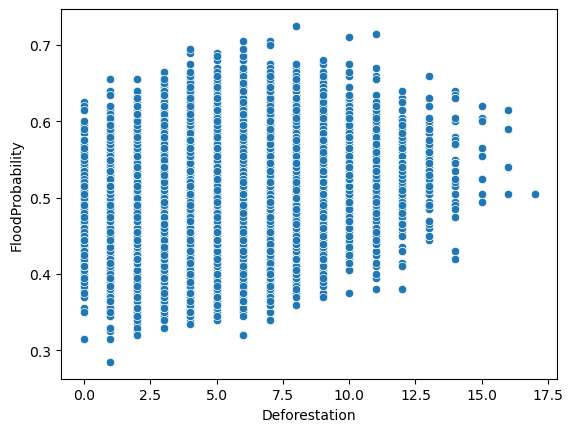

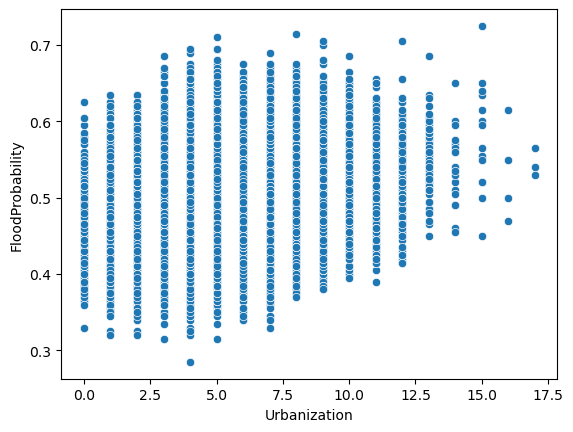

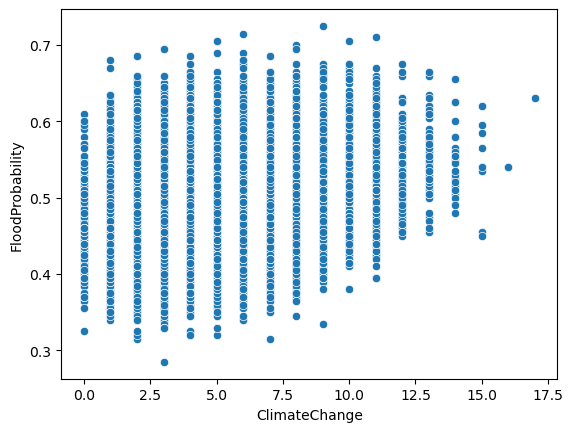

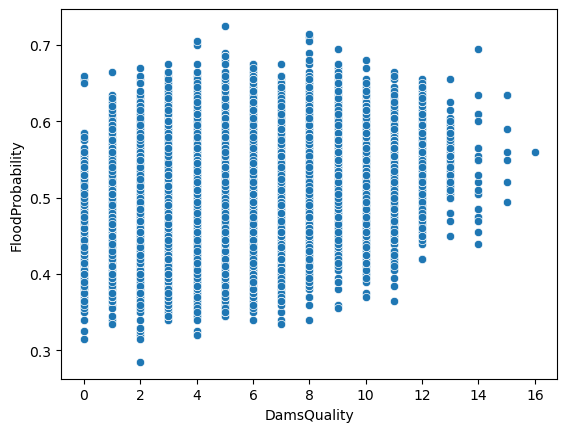

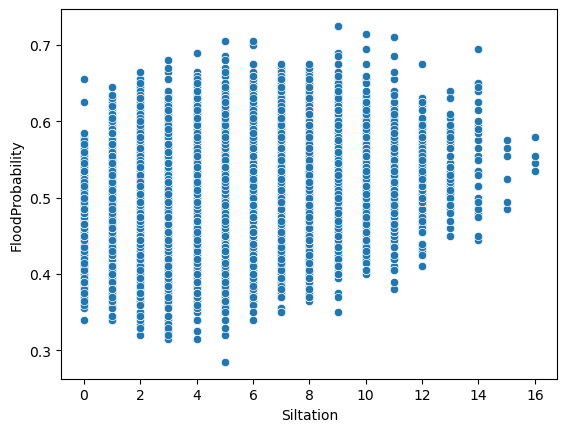

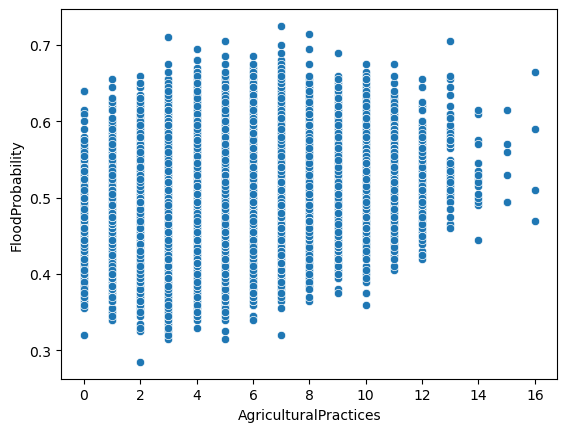

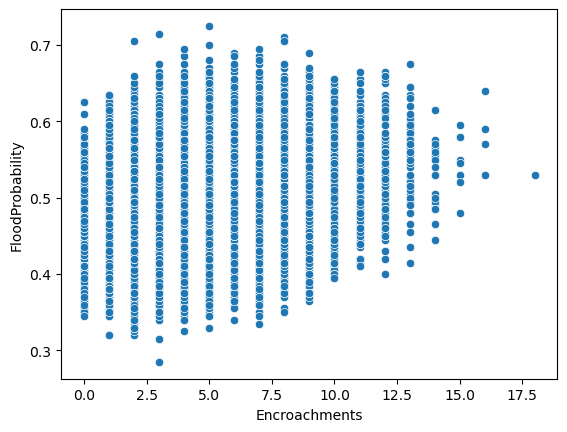

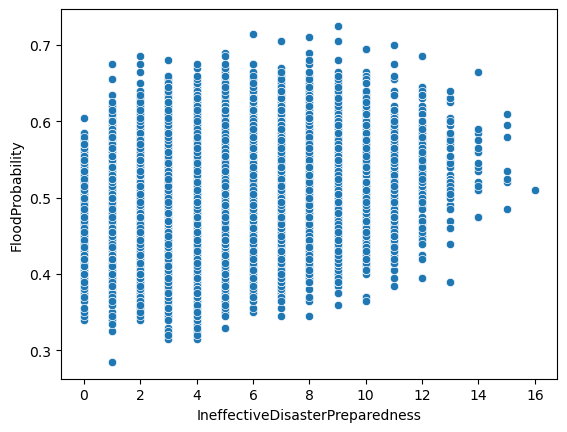

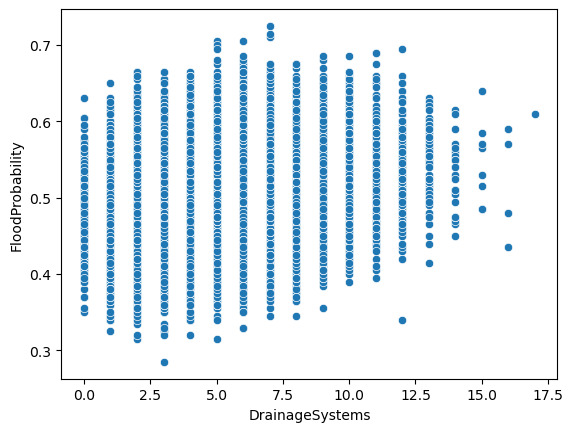

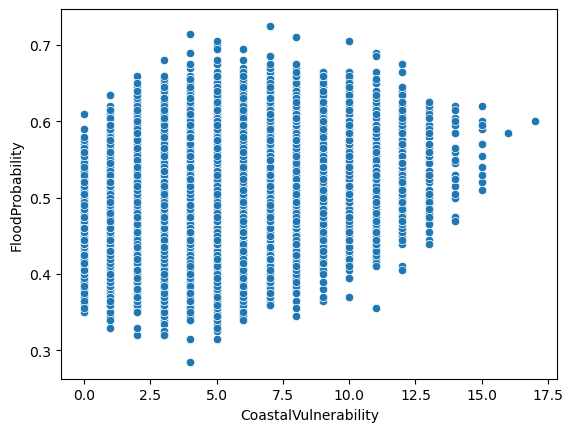

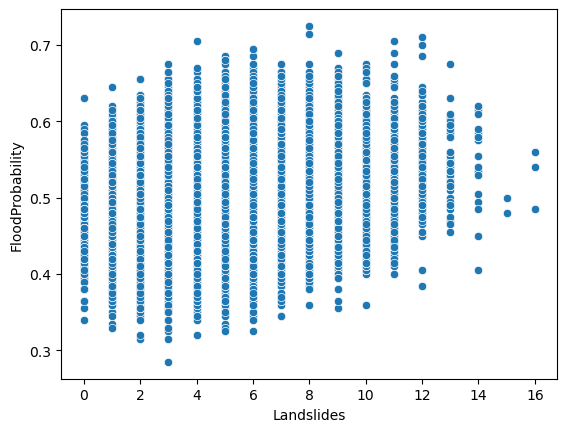

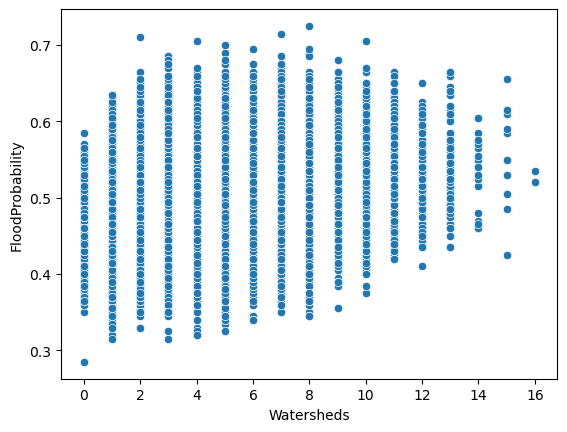

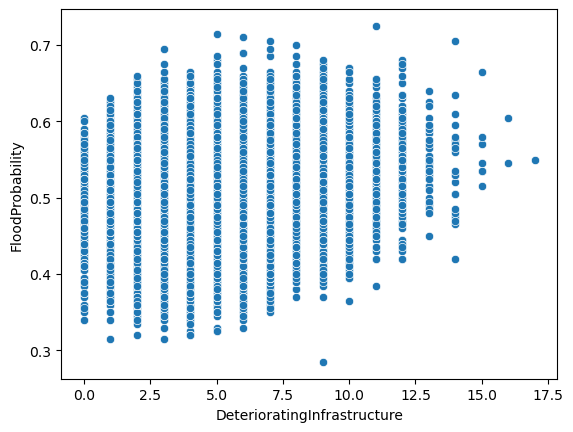

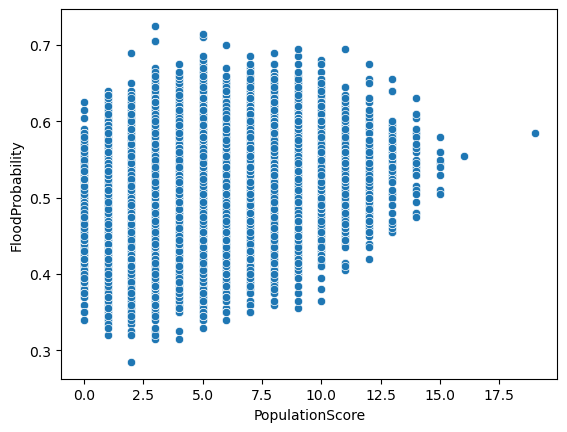

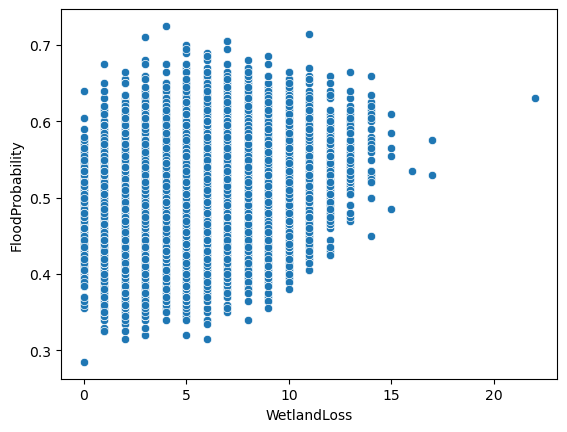

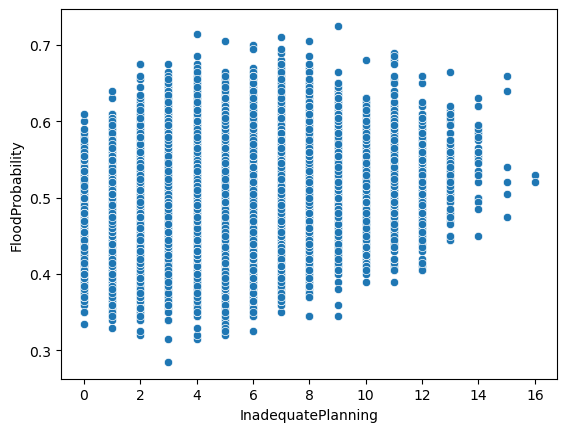

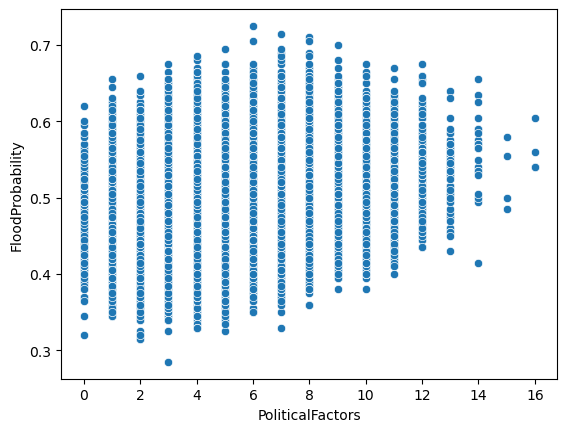

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in df.columns[:-1]:
    plt.figure()
    sns.scatterplot(data=df, x=df[feature], y=df["FloodProbability"])
    plt.xlabel(feature)
    plt.ylabel("FloodProbability")
    plt.show()
    plt.title(f"Scatter Plot of {feature} and FloodProbability")
    plt.close()


In [13]:
for feature in df.columns[:-1]:
    correlation = df[feature].corr(df["FloodProbability"])
    print(f"Корреляция {feature} с FloodProbability: {correlation}")

Корреляция MonsoonIntensity с FloodProbability: 0.22408068905676753
Корреляция TopographyDrainage с FloodProbability: 0.2294140006917522
Корреляция RiverManagement с FloodProbability: 0.22891711683389424
Корреляция Deforestation с FloodProbability: 0.22023716510931846
Корреляция Urbanization с FloodProbability: 0.2208665811946695
Корреляция ClimateChange с FloodProbability: 0.22098564286072495
Корреляция DamsQuality с FloodProbability: 0.2274669313211467
Корреляция Siltation с FloodProbability: 0.22654361219645952
Корреляция AgriculturalPractices с FloodProbability: 0.22184605060125898
Корреляция Encroachments с FloodProbability: 0.21825896430370245
Корреляция IneffectiveDisasterPreparedness с FloodProbability: 0.22512591815177024
Корреляция DrainageSystems с FloodProbability: 0.2178945956398846
Корреляция CoastalVulnerability с FloodProbability: 0.21518685142085978
Корреляция Landslides с FloodProbability: 0.22299137035263647
Корреляция Watersheds с FloodProbability: 0.228152074769302

Видно, что корреляция у всех фичей +- одинаковая, т.е нельзя выделить несколько наиболее важных фичей, базируясь только на корреляции